In [56]:
import pandas as pd 

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [57]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\nskor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


VIZUALIZACIA DAT

In [3]:
#nacitanie datasetu diabetes binary s nevyvazenou finalnou triedou, pre hodnoty 0 a 1
bd = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

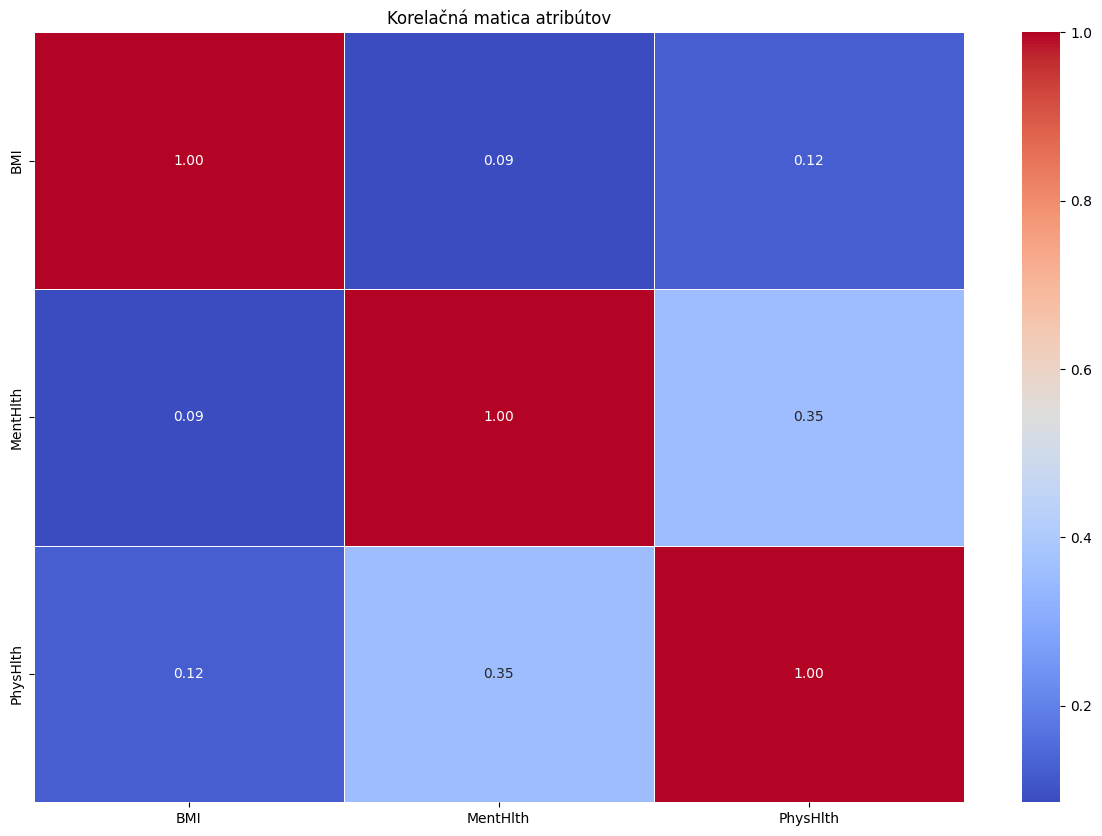

In [4]:
#korelacna matica funkcia .corr na vizualizaciu numerickych atributov, ktoré sme si zistili pri preštudovaní datsetu
numericke_atributy = ["BMI", "MentHlth", "PhysHlth"]
korelacna_matica = bd[numericke_atributy].corr()

# Vizualizácia korelačnej matice
plt.figure(figsize=(15, 10))
sns.heatmap(korelacna_matica, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelačná matica atribútov")
plt.show()

In [5]:
#funkcia na spocitanie pocetnosti kolko je 0 a kolko 1 (kolko respondentov ma diabetes a kolko nie)
bd.value_counts("Diabetes_binary")

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [6]:
#načítanie datasetu diabetes s hodnotami 012
#s nevyvazenou finalnou triedou
df_012 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

C:\Users\nskor\AppData\Local\Temp\ipykernel_8720\55606343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(bd, x="Diabetes_binary", palette=["#FF9999", "#66B3FF"])


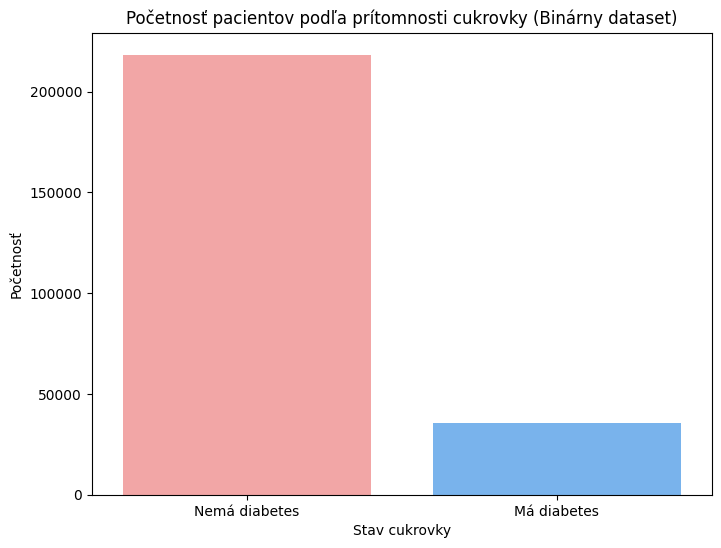

In [7]:
# countplot na vyjadrenie Početnosti jednotlivých hodnôt v cieľovej premennej
plt.figure(figsize=(8, 6))
sns.countplot(bd, x="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť pacientov podľa prítomnosti cukrovky (Binárny dataset)")
plt.xlabel("Stav cukrovky")
plt.ylabel("Početnosť")
# Nastavenie miesto cisel na ma diabetes alebo nema diabetes
plt.xticks(ticks=[0, 1], labels=["Nemá diabetes", "Má diabetes"])
plt.show()


C:\Users\nskor\AppData\Local\Temp\ipykernel_8720\3295733861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_012, x="Diabetes_012", palette=["#FF9999", "#66B3FF", "#99CC66"])


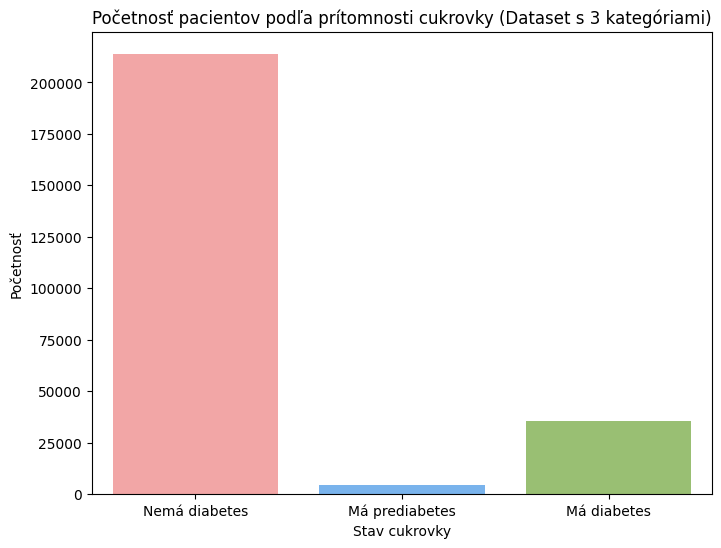

In [8]:
# countplot na vyjadrenie Početnosti jednotlivých hodnôt v cieľovej premennej pre dataset s 3 hodnotami
plt.figure(figsize=(8, 6))
sns.countplot(df_012, x="Diabetes_012", palette=["#FF9999", "#66B3FF", "#99CC66"])
plt.title("Početnosť pacientov podľa prítomnosti cukrovky (Dataset s 3 kategóriami)")
plt.xlabel("Stav cukrovky")
plt.ylabel("Početnosť")
# Nastavenie miesto cisel na ma diabetes alebo nema diabetes alebo ma prediabetes
plt.xticks(ticks=[0, 1, 2], labels=["Nemá diabetes", "Má prediabetes", "Má diabetes"])
plt.show()

In [9]:
df_012[df_012["Diabetes_012"] == 1].shape[0]

4631

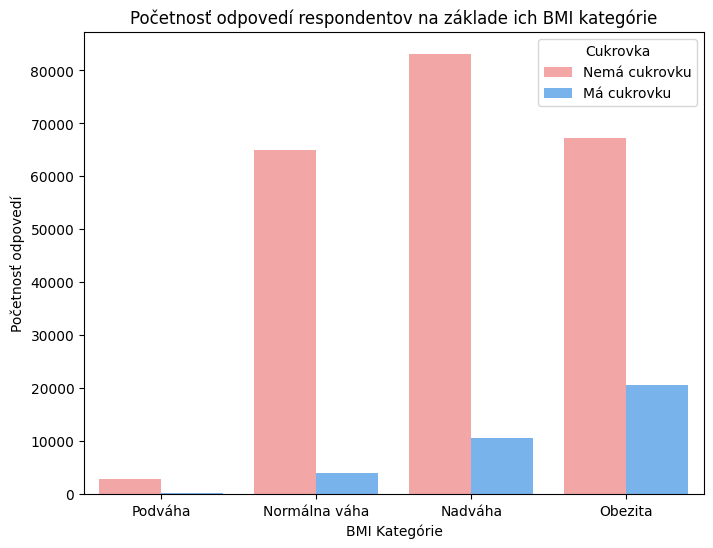

In [10]:
# Priradenie kategórii BMI cez funkciu pd cut podla standardneho rozdelenia do kategorii
bd["BMI_Kategória"] = pd.cut(bd["BMI"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Podváha", "Normálna váha", "Nadváha", "Obezita"])
# vytvorenie countplotu na vizualizaciu pocetnosti ludi s cukrovkou podla BMI kategorie
plt.figure(figsize=(8, 6))
sns.countplot(bd, x="BMI_Kategória",  hue="Diabetes_binary", order=["Podváha", "Normálna váha", "Nadváha", "Obezita"], palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť odpovedí respondentov na základe ich BMI kategórie")
plt.xlabel("BMI Kategórie")
plt.ylabel("Početnosť odpovedí")
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
sns.set_palette("pastel")
plt.show()

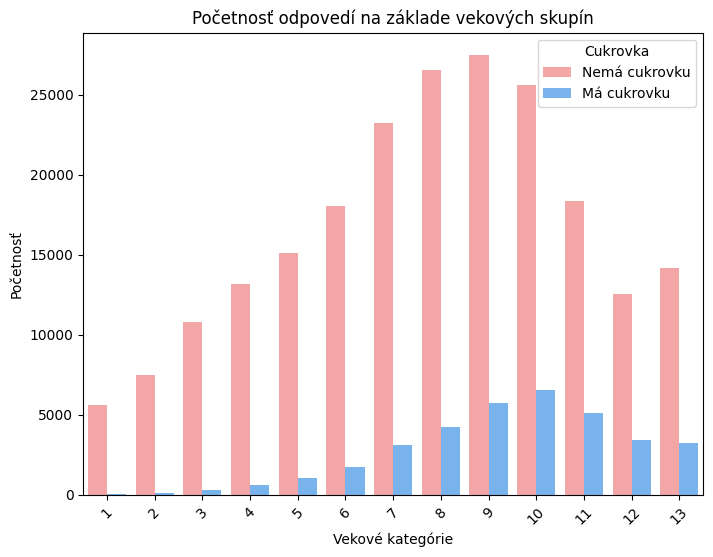

In [11]:
# Vytvorenie countplotu pre Početnosť odpovedí na základe vekovych skupin
plt.figure(figsize=(8, 6))
# pretipovanie atributu Age na int
bd["Age"] = bd["Age"].astype(int)
sns.countplot(bd, x="Age", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť odpovedí na základe vekových skupín")
plt.xlabel("Vekové kategórie")
plt.ylabel("Početnosť")
# Vytvorenie legendy pre diabetes
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
plt.xticks(rotation=45)
plt.show()

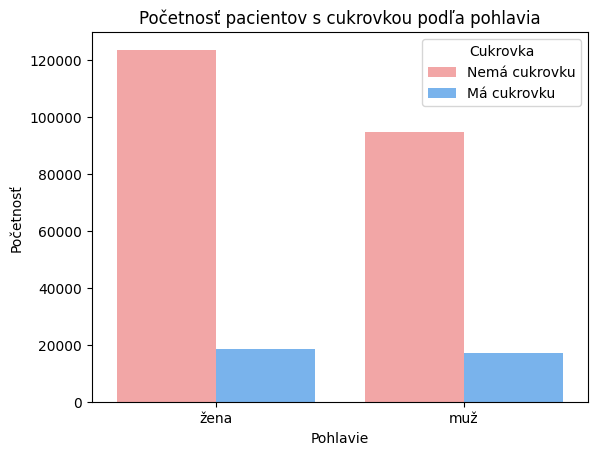

In [12]:
# Početnosť odpovedí na základe pohlavia
sns.countplot(bd, x="Sex", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť pacientov s cukrovkou podľa pohlavia")
plt.xlabel("Pohlavie")
plt.ylabel("Početnosť")
# Vytvorenie legendy pre diabetes
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
# premena x osi nie na cisla ale na kategorie muž žena
plt.xticks(ticks=[0, 1], labels=["žena", "muž"])
plt.show()

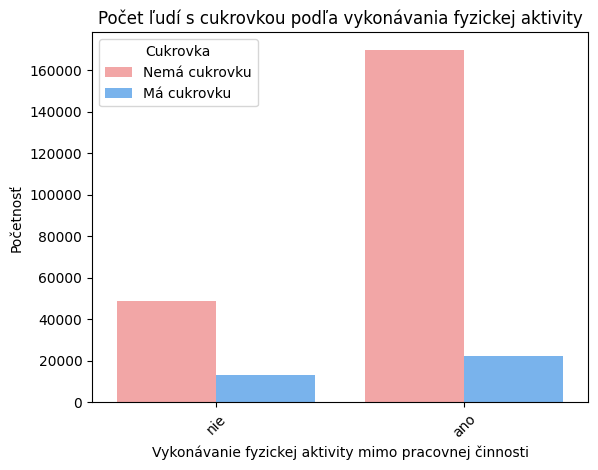

In [13]:
# Početnosť odpovedí na základe BMI podľa fyzickej aktivity
#plt.figure(figsize=(8, 6))
sns.countplot(bd, x="PhysActivity", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Počet ľudí s cukrovkou podľa vykonávania fyzickej aktivity")
plt.xlabel("Vykonávanie fyzickej aktivity mimo pracovnej činnosti")
plt.ylabel("Početnosť")
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
plt.xticks(rotation=45)
plt.xticks(ticks=[0, 1], labels=["nie", "ano"])
plt.show()

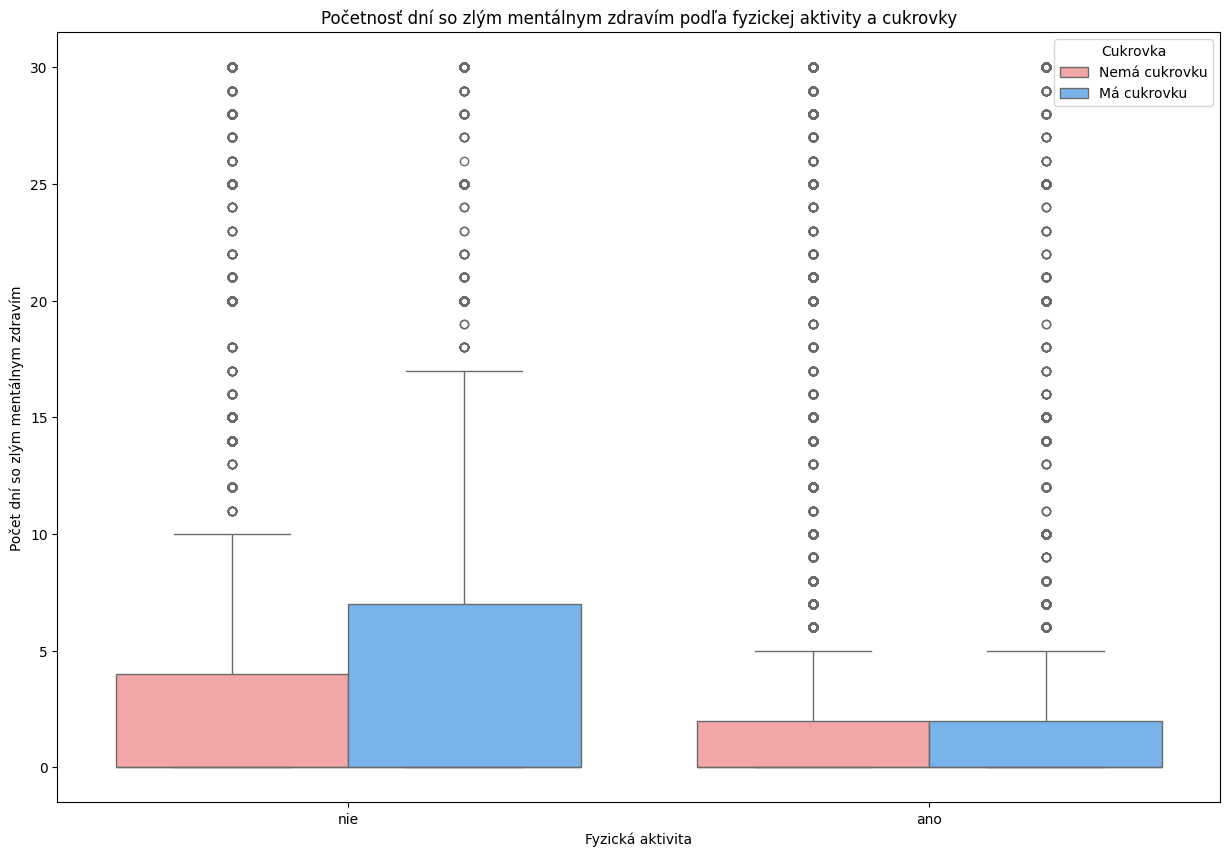

In [14]:
color_mapping = {"Nemá cukrovku": "#FF9999", "Má cukrovku": "#66B3FF"}
plt.figure(figsize=(15, 10))
sns.boxplot(data=bd, x="PhysActivity", y="MentHlth", hue=bd["Diabetes_binary"].map({0: "Nemá cukrovku", 1: "Má cukrovku"}), palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť dní so zlým mentálnym zdravím podľa fyzickej aktivity a cukrovky")
plt.xlabel("Fyzická aktivita")
plt.ylabel("Počet dní so zlým mentálnym zdravím")
plt.legend(title="Cukrovka")
plt.xticks(ticks=[0, 1], labels=["nie", "ano"])
plt.show()

In [15]:
# kolko je ludi podla pohlavia
bd.value_counts("Sex")

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [16]:
# nacitanie datasetu s vyvazenou finalnou triedou
halfdat= pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [17]:
# spocitanie hodnot pre 0 a 1 vo vyvazenom datsete
halfdat.value_counts("Diabetes_binary")

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [18]:
# kolko je ludi podla pohlavia vo vyvazenom datsete
halfdat.value_counts("Sex")

Sex
0.0    38386
1.0    32306
Name: count, dtype: int64

C:\Users\nskor\AppData\Local\Temp\ipykernel_8720\3434501535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(halfdat, x="Diabetes_binary", palette=["#FF9999", "#66B3FF"])


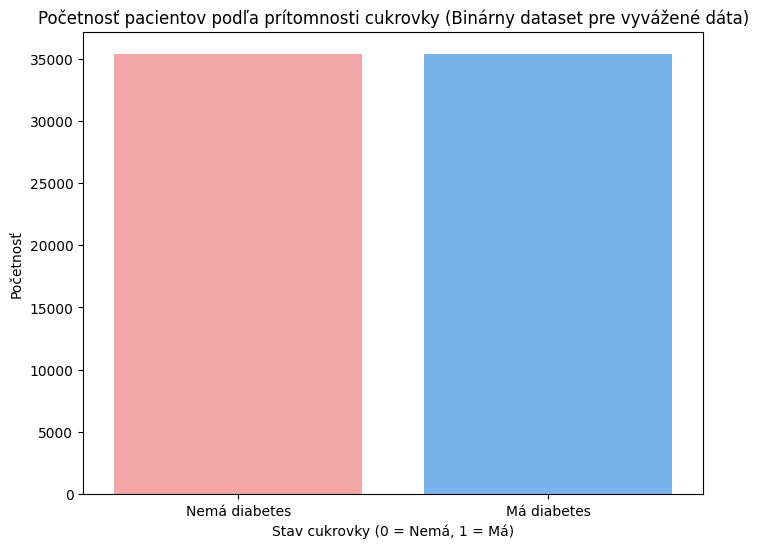

In [19]:
# countplot pre vyvazeny daset a vizualizacia pocetnosti pacientov 
plt.figure(figsize=(8, 6))
sns.countplot(halfdat, x="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť pacientov podľa prítomnosti cukrovky (Binárny dataset pre vyvážené dáta)")
plt.xlabel("Stav cukrovky (0 = Nemá, 1 = Má)")
plt.ylabel("Početnosť")
plt.xticks(ticks=[0, 1], labels=["Nemá diabetes", "Má diabetes"])
plt.show()

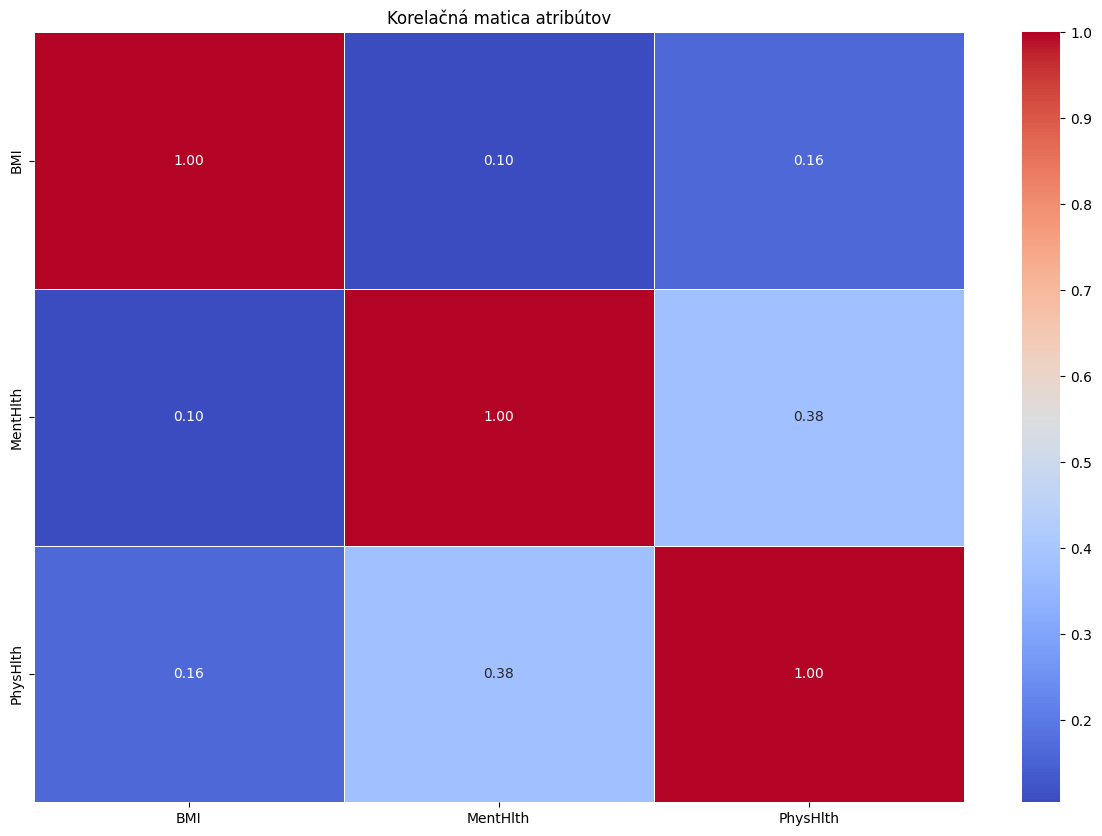

In [20]:
numericke_atributy = ["BMI", "MentHlth", "PhysHlth"]
correlation_matrix = halfdat[numericke_atributy].corr()
# Vizualizácia korelačnej matice pre bumericke atributy vo vyvazenom datsete
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelačná matica atribútov")
plt.show()

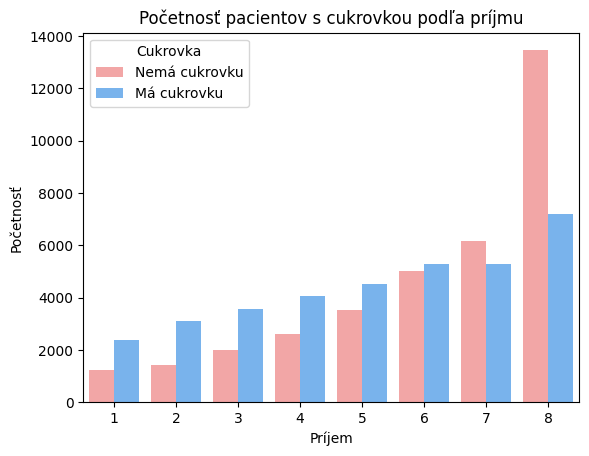

In [21]:
# Početnosť ludi co maju cukrovku a co nie na základe príjmu
halfdat["Income"] = halfdat["Income"].astype(int)
sns.countplot(halfdat, x="Income", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť pacientov s cukrovkou podľa príjmu")
plt.xlabel("Príjem")
plt.ylabel("Početnosť")
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
plt.show()

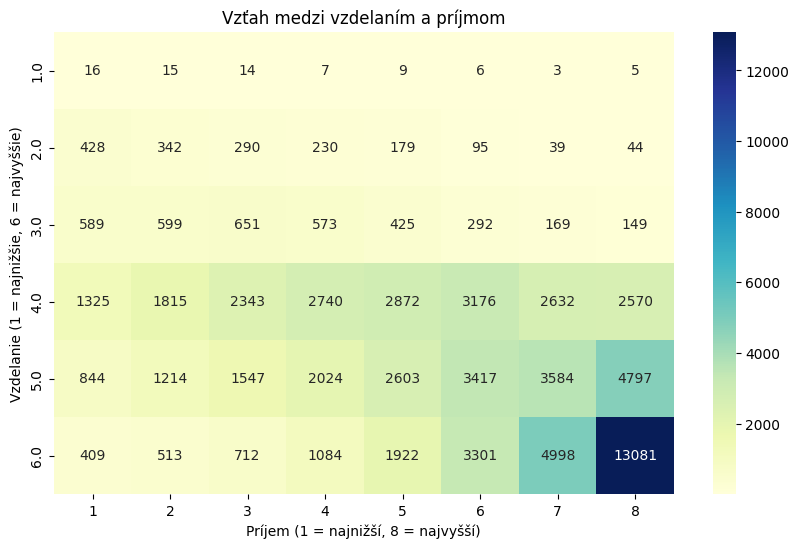

In [ ]:
# Vytvorenie kontingenčnej tabuľky, zobraziť vzťah medzi vzdelaním a príjmom
vzdelanie_prijem_kt = pd.crosstab(halfdat["Education"], halfdat["Income"])
# Vykreslenie heatmapy, annot=True pre zobrazenie hodnôt v bunkách, fmt="d" pre celé čísla, cmap="YlGnBu" pre farebnú schému
plt.figure(figsize=(10, 6))
sns.heatmap(vzdelanie_prijem_kt, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Vzťah medzi vzdelaním a príjmom")
plt.xlabel("Príjem (1 = najnižší, 8 = najvyšší)")
plt.ylabel("Vzdelanie (1 = najnižšie, 6 = najvyššie)")
plt.show()


C:\Users\nskor\AppData\Local\Temp\ipykernel_8720\3164213469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=halfdat, x="Phys_kategórie", y="MentHlth", palette="pastel")


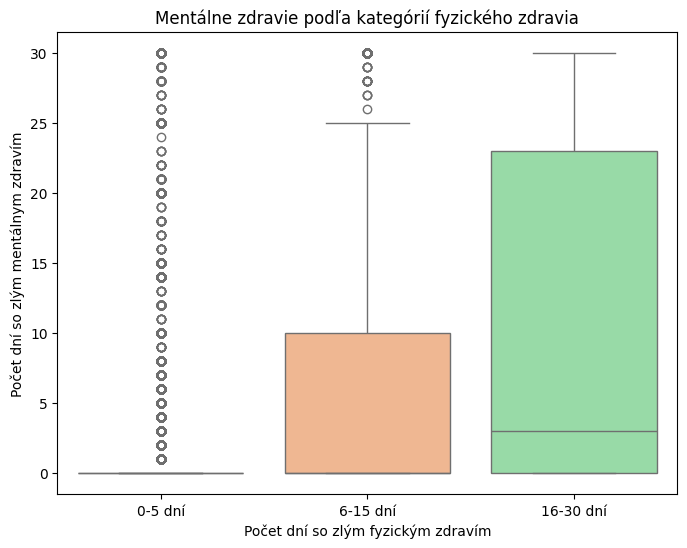

In [23]:
# vzťah medzi fyzickým a mentálnym zdravím, kde fyzické zdravie je rozdelené do 3 kategórií pomocou funkcie pd.cut
# a vizualizované pomocou boxplotu
halfdat["Phys_kategórie"] = pd.cut(halfdat["PhysHlth"], bins=[-1, 5, 15, 30], labels=["0-5 dní", "6-15 dní", "16-30 dní"])
plt.figure(figsize=(8, 6))
sns.boxplot(data=halfdat, x="Phys_kategórie", y="MentHlth", palette="pastel")
plt.title("Mentálne zdravie podľa kategórií fyzického zdravia")
plt.xlabel("Počet dní so zlým fyzickým zdravím")
plt.ylabel("Počet dní so zlým mentálnym zdravím")
plt.show()

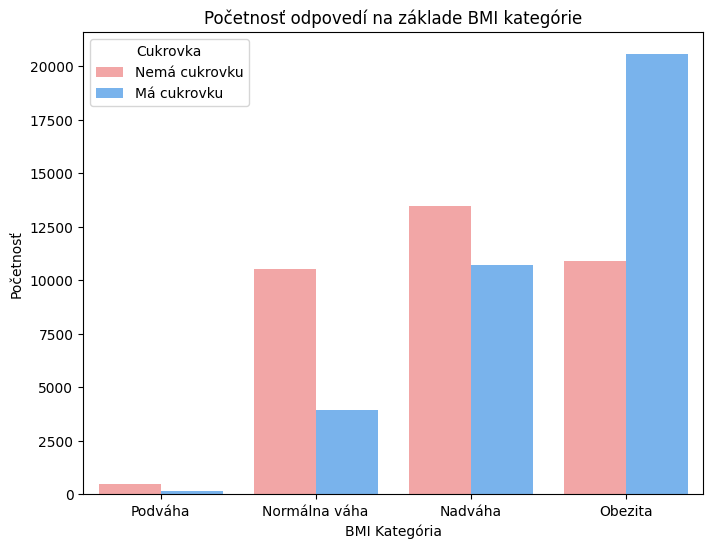

In [ ]:
# graf na vizualizaciu BMi kategórií a ich vzťahu k cukrovke
# Priradenie kategórie BMI cez funkciu pd cut podla standardneho rozdelenia do kategorii
halfdat["BMI_Kategória"] = pd.cut(halfdat["BMI"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Podváha", "Normálna váha", "Nadváha", "Obezita"])
# Početnosť odpovedí na základe BMI kategórie
plt.figure(figsize=(8, 6))
sns.countplot(halfdat, x="BMI_Kategória",  hue="Diabetes_binary", order=["Podváha", "Normálna váha", "Nadváha", "Obezita"], palette=["#FF9999", "#66B3FF"])
plt.title("Početnosť odpovedí na základe BMI kategórie")
plt.xlabel("BMI Kategória")
plt.ylabel("Početnosť")
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
sns.set_palette("pastel")
plt.show()

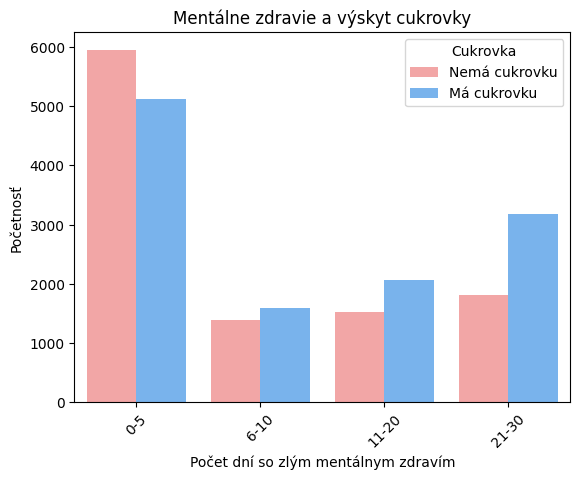

In [ ]:
# graf na vizualizaciu Mentálneho zdravia a výskytu cukrovky
# Priradenie MentHlth kategorie podľa počtu dní so zlým mentálnym zdravím rozdelene na 4 kategórie
# a vizualizované pomocou countplotu
halfdat["MentHlth_kategoria"] = pd.cut(halfdat["MentHlth"], bins=[0, 6, 11, 21, 30], labels=["0-5", "6-10", "11-20", "21-30"])
sns.countplot(halfdat, x="MentHlth_kategoria", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Mentálne zdravie a výskyt cukrovky")
plt.xlabel("Počet dní so zlým mentálnym zdravím")
plt.ylabel("Početnosť")
# premena x osi nie na cisla ale na kategorie
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
# rotation pre otocenie udajov na x osi pre dobru čitateľnosť
plt.xticks(rotation=45)
plt.show()

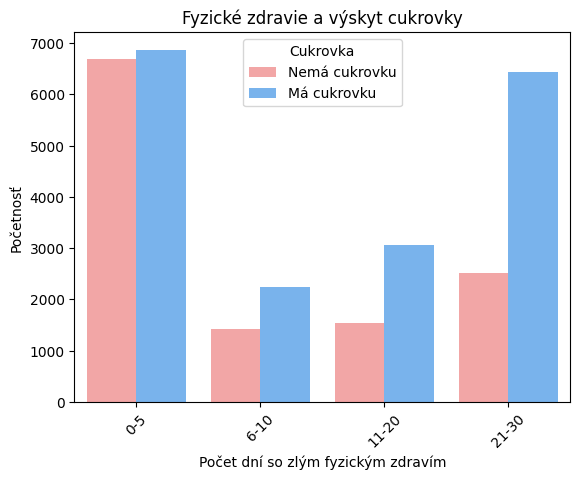

In [ ]:
# graf na vizualizaciu Fyzickeho zdravia a výskytu cukrovky
# Priradenie PhysHlth kategorie podľa počtu dní so zlým fyzickým zdravím rozdelene na 4 kategórie
# a vizualizované pomocou countplotu
halfdat["PhysHlth_kategoria"] = pd.cut(halfdat["PhysHlth"], bins=[0, 6, 11, 21, 30], labels=["0-5", "6-10", "11-20", "21-30"])
sns.countplot(halfdat, x="PhysHlth_kategoria", hue="Diabetes_binary", palette=["#FF9999", "#66B3FF"])
plt.title("Fyzické zdravie a výskyt cukrovky")
plt.xlabel("Počet dní so zlým fyzickým zdravím")
plt.ylabel("Početnosť")
# premena x osi nie na cisla ale na kategorie
plt.legend(title="Cukrovka", labels=["Nemá cukrovku", "Má cukrovku"])
# rotation pre otocenie udajov na x osi pre dobru čitateľnosť
plt.xticks(rotation=45)
plt.show()

PRIPRAVA DAT

Počet duplikátov v datasete: 1635
Top 10 atribútov s najslabšou koreláciou s cieľovou premennou:
Age_8              0.002135
Income_6           0.006416
Education_5        0.014410
AnyHealthcare_1    0.027034
Age_7              0.029114
NoDocbcCost_1      0.036145
Income_7           0.039484
Income_5           0.039500
Sex_1              0.042538
Fruits_1           0.044560
dtype: float64

Odstránených 11 atribútov:
['Age_8', 'Income_6', 'Education_5', 'AnyHealthcare_1', 'Age_7', 'NoDocbcCost_1', 'Income_7', 'Income_5', 'Sex_1', 'Fruits_1', 'Age_13']

 Rozdelenie tried v trénovacej množine:
Diabetes_binary
1    0.508227
0    0.491773
Name: proportion, dtype: float64

 Rozdelenie tried v testovacej množine:
Diabetes_binary
1    0.508254
0    0.491746
Name: proportion, dtype: float64

 Chýbajúce hodnoty v dátach:
Series([], dtype: int64)

 Minimálne a maximálne hodnoty po Min-Max škálovaní:
BMI: min = 0.00, max = 1.00
MentHlth: min = 0.00, max = 1.00
PhysHlth: min = 0.00, max = 1.00

 Uk

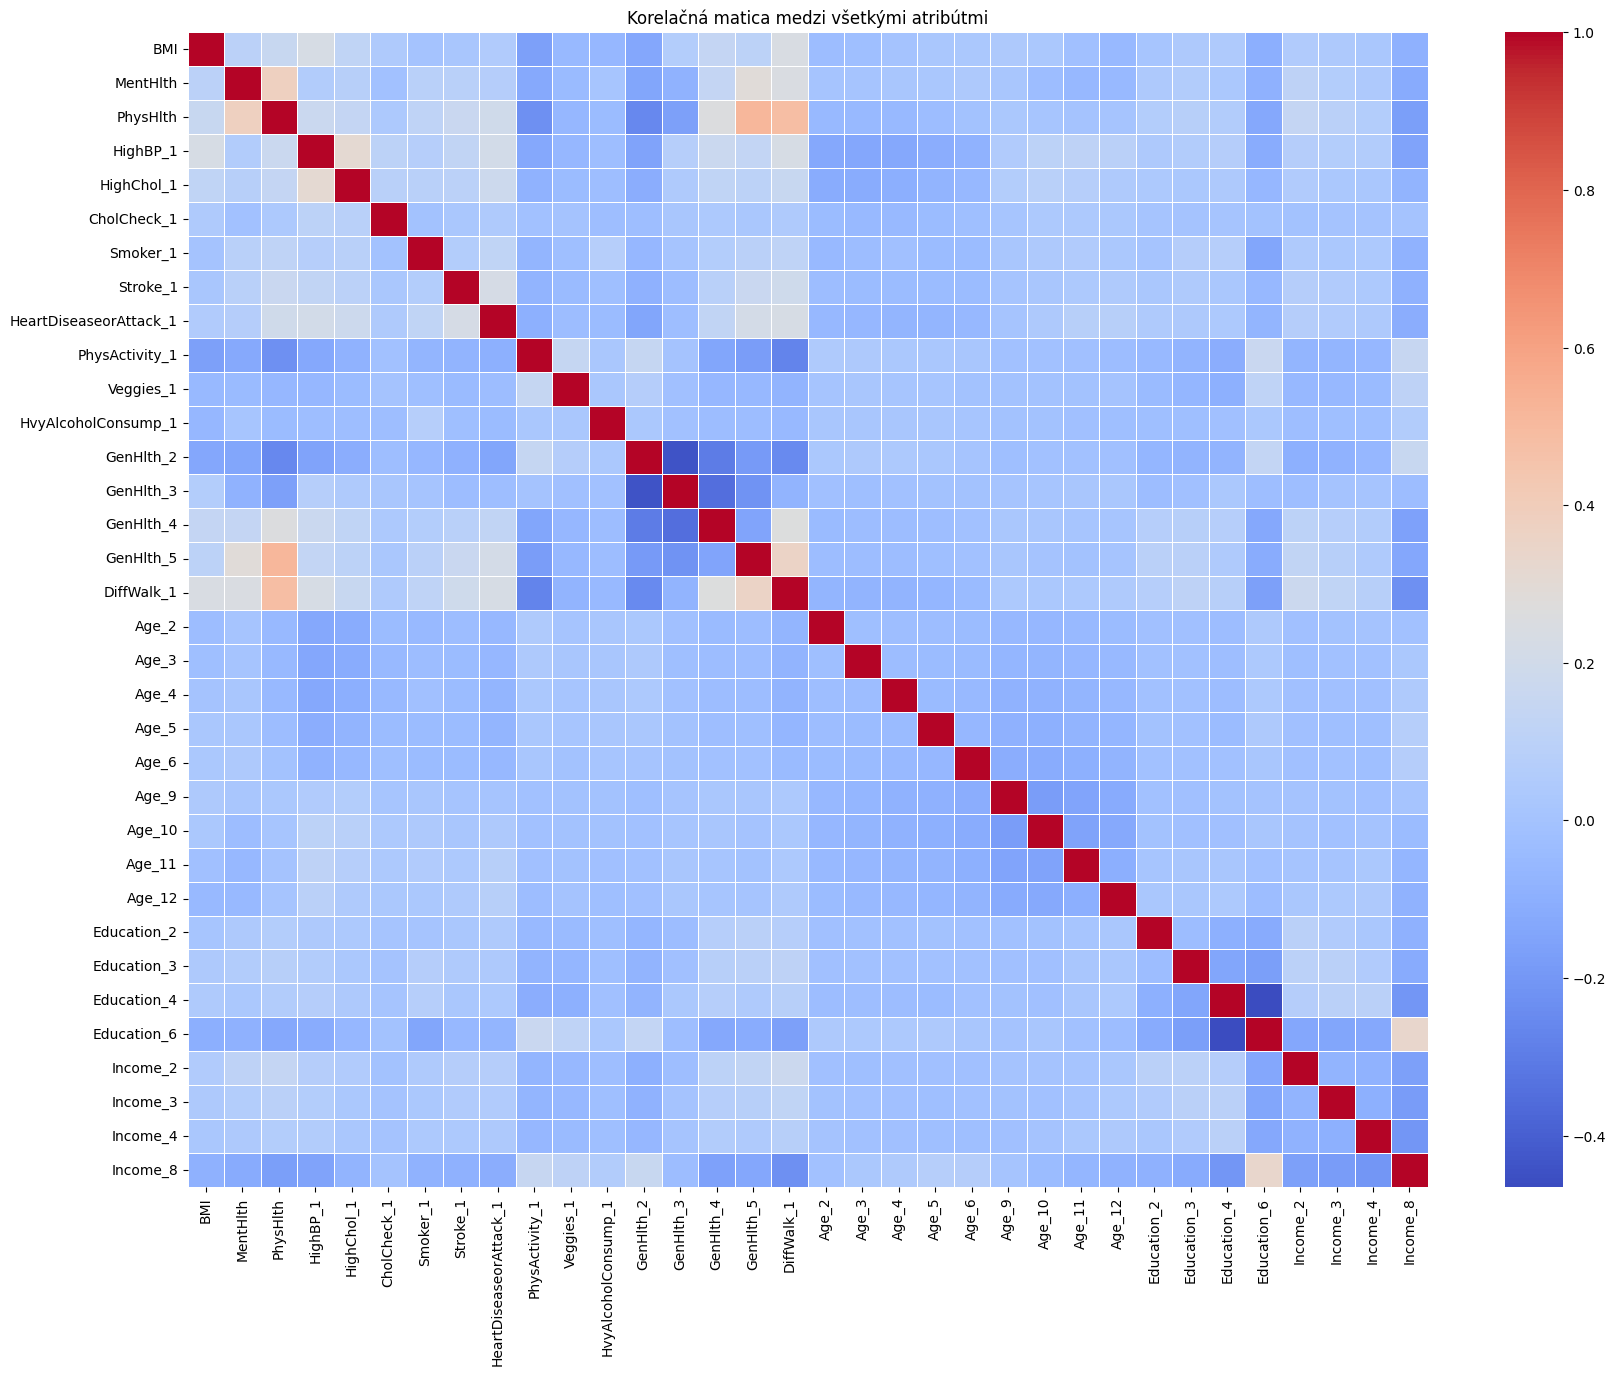

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Zistenie počtu duplikátov v datasete
numericke_duplikaty = halfdat.duplicated().sum()
print(f"Počet duplikátov v datasete: {numericke_duplikaty}")

# Odstránenie duplikátov
halfdat = halfdat.drop_duplicates()

# Výber iba číselných atribútov
halfdat = halfdat.select_dtypes(include=["number"])

# Konverzia všetkých hodnôt na celé čísla (ak sú float)
halfdat = halfdat.astype(int)

# Rozdelenie atribútov a cieľovej premennej
X = halfdat.drop(columns=["Diabetes_binary"])
y = halfdat["Diabetes_binary"]

# Definovanie kategorizovaných a numerických atribútov
categorical = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Age", "Education", "Income"
]
numerical = ["BMI", "MentHlth", "PhysHlth"]

# One-Hot Encoding pre kategorické atribúty, pomocou get_dummies
# Odstránenie prvého stĺpca pre každú kategóriu (drop_first=True)
X_encoded = pd.get_dummies(X, columns=categorical, drop_first=True)

# Min-Max normalizácia numerických atribútov
# Vytvorenie inštancie MinMaxScaler a aplikovanie na numerické atribúty
scaler = MinMaxScaler()
X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Vypočítanie korelácie každého atribútu s cieľovou premennou (absolútna hodnota)a zoradí ich podľa hodnoty
korelacia_s_cielovou_premennou = X_encoded.corrwith(y).abs().sort_values()

# Výpis 10 atribútov s najslabšou koreláciou
print("Top 10 atribútov s najslabšou koreláciou s cieľovou premennou:")
print(korelacia_s_cielovou_premennou.head(10))


# Zoznam atribútov s koreláciou < 0.05
malo_korelovane = korelacia_s_cielovou_premennou[korelacia_s_cielovou_premennou < 0.05].index.tolist()

# Odstránenie takýchto malo kolerovaných stĺpcov z dát a vypísanie konkrétnych názvov stĺpcov
X_encoded = X_encoded.drop(columns=malo_korelovane)
print(f"\nOdstránených {len(malo_korelovane)} atribútov:")
print(malo_korelovane)

# Rozdelenie dát na trénovaciu a testovaciu množinu, stratify pre zachovanie rozdelenia tried
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Kontrola rozdelenia tried
print("\n Rozdelenie tried v trénovacej množine:")
print(y_train.value_counts(normalize=True).rename("proportion"))

print("\n Rozdelenie tried v testovacej množine:")
print(y_test.value_counts(normalize=True).rename("proportion"))

# Kontrola chýbajúcich hodnôt
missing_values = halfdat.isnull().sum()
print("\n Chýbajúce hodnoty v dátach:")
print(missing_values[missing_values > 0])

# Overenie rozsahu hodnôt po normalizácii
print("\n Minimálne a maximálne hodnoty po Min-Max škálovaní:")
for col in numerical:
    min_val = X_encoded[col].min()
    max_val = X_encoded[col].max()
    print(f"{col}: min = {min_val:.2f}, max = {max_val:.2f}")

# Ukážka normalizovaných číselných atribútov
print("\n Ukážka prvých 5 riadkov normalizovaných číselných atribútov:")
print(X_encoded[numerical].head())

# Vizualizácia korelačnej matice
corr_matrix = X_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Korelačná matica medzi všetkými atribútmi")
plt.show()


In [28]:
# Výpis 10 atribútov s najsilnejšou koreláciou
print("Top 10 atribútov s najsilnejšou koreláciou s cieľovou premennou:")
print(korelacia_s_cielovou_premennou.tail(10))


Top 10 atribútov s najsilnejšou koreláciou s cieľovou premennou:
GenHlth_5                 0.169677
Income_8                  0.178807
PhysHlth                  0.206868
HeartDiseaseorAttack_1    0.207229
GenHlth_2                 0.222078
GenHlth_4                 0.222290
DiffWalk_1                0.267082
HighChol_1                0.281399
BMI                       0.285643
HighBP_1                  0.372048
dtype: float64


MODELOVANIE

In [29]:
#nacitanie kniznic na modely
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [30]:

# Naive Bayes – základný (Gaussian) model
# Vytvorenie modelu a trénovanie
NB_orig = GaussianNB()
NB_orig.fit(X_train, y_train)
y_pred_NB_orig = NB_orig.predict(X_test)
print("\nNaive Bayes:")
print(classification_report(y_test, y_pred_NB_orig))




Naive Bayes:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      6792
           1       0.69      0.77      0.73      7020

    accuracy                           0.71     13812
   macro avg       0.71      0.71      0.71     13812
weighted avg       0.71      0.71      0.71     13812



In [31]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_NB = confusion_matrix(y_test, y_pred_NB_orig)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_NB)


Kontingenčná tabuľka:
[[4411 2381]
 [1622 5398]]


In [32]:
# Logistická regresia – základná
# Vytvorenie modelu a trénovanie, max_iter=1000 pre zamedzenie varovania o konvergencii
LR_orig = LogisticRegression(max_iter=1000)
LR_orig.fit(X_train, y_train)
y_pred_LR_orig = LR_orig.predict(X_test)
print("\nLogistická regresia:")
print(classification_report(y_test, y_pred_LR_orig))



Logistická regresia:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6792
           1       0.73      0.78      0.75      7020

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



In [33]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_LR = confusion_matrix(y_test, y_pred_LR_orig)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_LR)


Kontingenčná tabuľka:
[[4820 1972]
 [1575 5445]]


In [34]:
# KNN – základný
# Vytvorenie modelu a trénovanie
# n_neighbors=5 pre nastavenie počtu susedov na 5
KNN_orig = KNeighborsClassifier(n_neighbors=5)
KNN_orig.fit(X_train, y_train)
y_pred_KNN_orig = KNN_orig.predict(X_test)
print("\nKNN: ")
print(classification_report(y_test, y_pred_KNN_orig))



KNN: 
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      6792
           1       0.70      0.73      0.71      7020

    accuracy                           0.70     13812
   macro avg       0.70      0.70      0.70     13812
weighted avg       0.70      0.70      0.70     13812



In [35]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_KNN = confusion_matrix(y_test, y_pred_KNN_orig)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_KNN)


Kontingenčná tabuľka:
[[4563 2229]
 [1881 5139]]


In [36]:
# Rozhodovací strom – základný
# Vytvorenie modelu a trénovanie
# random_state=42 pre zamedzenie náhodnosti
RS_orig = DecisionTreeClassifier(random_state=42)
RS_orig.fit(X_train, y_train)
y_pred_RS_orig = RS_orig.predict(X_test)
print("\nRozhodovací strom:")
print(classification_report(y_test, y_pred_RS_orig))


Rozhodovací strom:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6792
           1       0.65      0.63      0.64      7020

    accuracy                           0.64     13812
   macro avg       0.64      0.64      0.64     13812
weighted avg       0.64      0.64      0.64     13812



In [37]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_RS = confusion_matrix(y_test, y_pred_RS_orig)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_RS)


Kontingenčná tabuľka:
[[4411 2381]
 [2595 4425]]


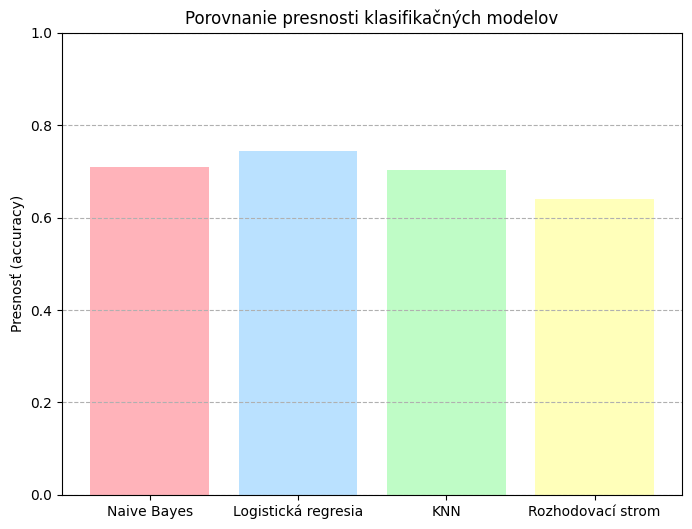

In [38]:
# Výpočet presnosti pre každý model
accuracy_scores = {
    "Naive Bayes": accuracy_score(y_test, y_pred_NB_orig),
    "Logistická regresia": accuracy_score(y_test, y_pred_LR_orig),
    "KNN": accuracy_score(y_test, y_pred_KNN_orig),
    "Rozhodovací strom": accuracy_score(y_test, y_pred_RS_orig)
}

# Vykreslenie stĺpcového grafu s presnosťou všetkých modelov na porovnanie
# accuracy_scores.keys() pre názvy modelov
# accuracy_scores.values() pre hodnoty presnosti
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color = ["#FFB3BA", "#BAE1FF", "#BFFCC6", "#FFFFBA"])
plt.ylim(0, 1)
plt.ylabel("Presnosť (accuracy)")
plt.title("Porovnanie presnosti klasifikačných modelov")
plt.grid(axis="y", linestyle="--")
plt.show()


VYLEPSENIE MODELOV

In [39]:
# Nacitanie kniznic na modely
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



In [40]:
# Naive Bayes – vhodnejší pre binárne dáta (BernoulliNB) 
# Vytvorenie modelu a trénovanie
# BernoulliNB je vhodný pre binárne dáta, pretože predpokladá, že atribúty sú binárne (0 alebo 1), čo je v súlade s naším datasetom
NB_vlp = BernoulliNB()
NB_vlp.fit(X_train, y_train)
y_pred_NB_vlp = NB_vlp.predict(X_test)
print("\nNaive Bayes (vylepšený – Bernoulli):")
print(classification_report(y_test, y_pred_NB_vlp))


Naive Bayes (vylepšený – Bernoulli):
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6792
           1       0.73      0.71      0.72      7020

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



In [41]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_NB_VLP = confusion_matrix(y_test, y_pred_NB_vlp)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_NB_VLP)


Kontingenčná tabuľka:
[[4905 1887]
 [2037 4983]]


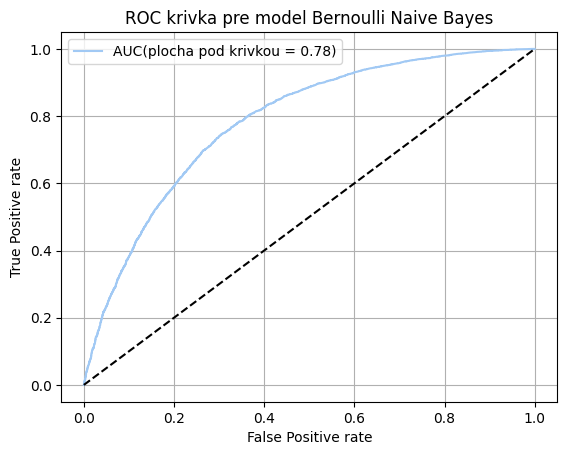

In [42]:
# predikcia pravdepodobnosti pre ROC krivku
# získanie pravdepodobností pre triedu 1 (pozitívnu triedu)- ma cukrovku
# predict_proba vráti pravdepodobnosti pre obe triedy, vyberieme iba pravdepodobnosť pre pozitívnu triedu
NB_pravdepodobnost_cukrovky = NB_vlp.predict_proba(X_test)[:, 1]

# získanie hodnoty pre ROC krivku
fpr, tpr, thresholds = roc_curve(y_test, NB_pravdepodobnost_cukrovky)
# vypocet AUC (plocha pod krivkou)
# AUC je metrika, ktorá hodnotí výkonnosť klasifikačného modelu
#fpr – miera falošne pozitívnych (False Positive Rate)
#tpr – miera pravdivých pozitívnych (True Positive Rate)
roc_auc = auc(fpr, tpr)

# Vykreslenie krivky
#plocha pod krivkou (AUC) je metrika, ktorá hodnotí výkonnosť klasifikačného modelu, .2f zaokruhlenie na 2 desatine miesta
plt.figure()
plt.plot(fpr, tpr, label=f'AUC(plocha pod krivkou = {roc_auc:.2f})')
#kreslenie diagonálnej čiary, ktorá predstavuje náhodný klasifikátor, pod 45 stupnovym uhlom
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC krivka pre model Bernoulli Naive Bayes')
plt.legend()
# grid True pre zobrazenie mriežky na grafe
plt.grid(True)
plt.show()


In [43]:
# Logistická regresia – vylepšená
# Vytvorenie modelu a trénovanie
# max_iter=3000 pre zamedzenie varovania o konvergencii
# C=1.0 pre nastavenie hodnoty regularizácie
# solver='liblinear' pre optimalizáciu modelu
# penalty='l2' pre L2 regularizáciu
LR_vlp = LogisticRegression(max_iter=3000, C=1.0, solver='liblinear', penalty='l2')
LR_vlp.fit(X_train, y_train)
y_pred_LR_vlp = LR_vlp.predict(X_test)
print("\nLogistická regresia (vylepšená):")
print(classification_report(y_test, y_pred_LR_vlp))


Logistická regresia (vylepšená):
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6792
           1       0.73      0.78      0.75      7020

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



In [44]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_LR_VLP = confusion_matrix(y_test, y_pred_LR_vlp)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_LR_VLP)


Kontingenčná tabuľka:
[[4821 1971]
 [1575 5445]]


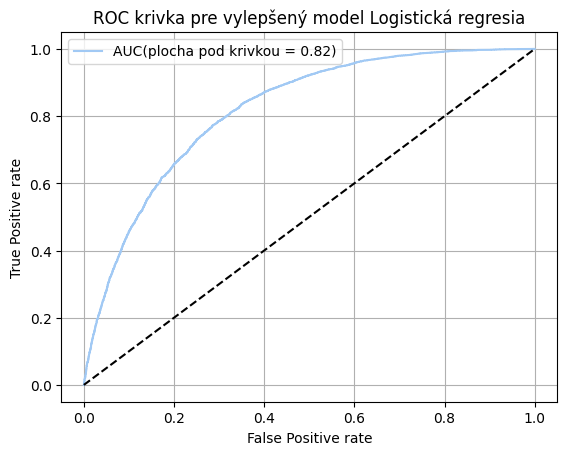

In [45]:
# predikcia pravdepodobnosti pre ROC krivku
# získanie pravdepodobností pre triedu 1 (pozitívnu triedu)- ma cukrovku
# predict_proba vráti pravdepodobnosti pre obe triedy, vyberieme iba pravdepodobnosť pre pozitívnu triedu
LR_pravdepodobnost_cukrovky =  LR_vlp.predict_proba(X_test)[:, 1]

# získanie hodnoty pre ROC krivku
fpr, tpr, thresholds = roc_curve(y_test, LR_pravdepodobnost_cukrovky)
# vypocet AUC (plocha pod krivkou)
# AUC je metrika, ktorá hodnotí výkonnosť klasifikačného modelu
#fpr – miera falošne pozitívnych (False Positive Rate)
#tpr – miera pravdivých pozitívnych (True Positive Rate)
roc_auc = auc(fpr, tpr)
# Vykreslenie krivky
#plocha pod krivkou (AUC) je metrika, ktorá hodnotí výkonnosť klasifikačného modelu, .2f zaokruhlenie na 2 desatine miesta
plt.figure()
plt.plot(fpr, tpr, label=f'AUC(plocha pod krivkou = {roc_auc:.2f})')
#kreslenie diagonálnej čiary, ktorá predstavuje náhodný klasifikátor, pod 45 stupnovym uhlom
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC krivka pre vylepšený model Logistická regresia')
plt.legend()
# grid True pre zobrazenie mriežky na grafe
plt.grid(True)
plt.show()


In [49]:
# KNN – vylepšený
# Vytvorenie modelu a trénovanie
# n_neighbors=9 pre nastavenie počtu susedov na 9
# weights='uniform' pre nastavenie váh na rovnaké pre všetkých susedov
# metric='euclidean' pre nastavenie metriky na euklidovskú vzdialenosť
# n_neighbors=9 pre nastavenie počtu susedov na 9
KNN_vlp = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
KNN_vlp.fit(X_train, y_train)
y_pred_KNN_vlp = KNN_vlp.predict(X_test)
print("\nKNN (vylepšený, k=7):")
print(classification_report(y_test, y_pred_KNN_vlp))



KNN (vylepšený, k=7):
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      6792
           1       0.71      0.76      0.73      7020

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



In [50]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_KNN_VLP = confusion_matrix(y_test, y_pred_KNN_vlp)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_KNN_VLP)


Kontingenčná tabuľka:
[[4584 2208]
 [1716 5304]]


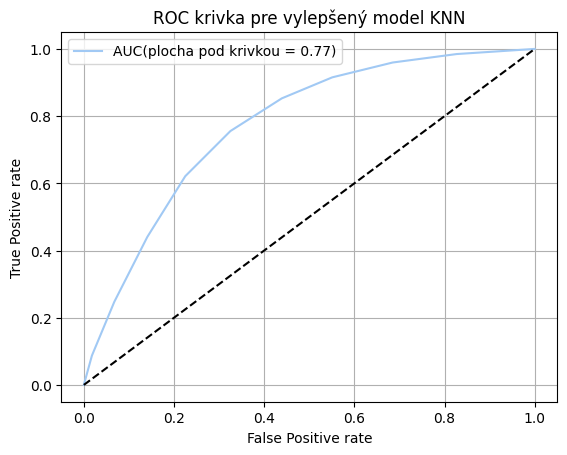

In [51]:
# predikcia pravdepodobnosti pre ROC krivku
# získanie pravdepodobností pre triedu 1 (pozitívnu triedu)- ma cukrovku
# predict_proba vráti pravdepodobnosti pre obe triedy, vyberieme iba pravdepodobnosť pre pozitívnu triedu
KNN_pravdepodobnost_cukrovky =  KNN_vlp.predict_proba(X_test)[:, 1]

# získanie hodnoty pre ROC krivku
fpr, tpr, thresholds = roc_curve(y_test, KNN_pravdepodobnost_cukrovky)
# vypocet AUC (plocha pod krivkou)
# AUC je metrika, ktorá hodnotí výkonnosť klasifikačného modelu
#fpr – miera falošne pozitívnych (False Positive Rate)
#tpr – miera pravdivých pozitívnych (True Positive Rate)
roc_auc = auc(fpr, tpr)
# Vykreslenie krivky
#plocha pod krivkou (AUC) je metrika, ktorá hodnotí výkonnosť klasifikačného modelu, .2f zaokruhlenie na 2 desatine miesta
plt.figure()
plt.plot(fpr, tpr, label=f'AUC(plocha pod krivkou = {roc_auc:.2f})')
#kreslenie diagonálnej čiary, ktorá predstavuje náhodný klasifikátor, pod 45 stupnovym uhlom
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC krivka pre vylepšený model KNN')
plt.legend()
# grid True pre zobrazenie mriežky na grafe
plt.grid(True)
plt.show()


In [52]:
# Rozhodovací strom – vylepšený
# Vytvorenie modelu a trénovanie
# max_depth=5 pre nastavenie maximálnej hĺbky stromu na 5
# min_samples_split=10 pre nastavenie minimálneho počtu vzoriek na rozdelenie uzla na 10
# criterion='gini' pre použitie Giniho indexu ako kritéria rozdelenia
# random_state=42 pre zamedzenie náhodnosti
RS_vlp= DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='gini', random_state=42)
RS_vlp.fit(X_train, y_train)
y_pred_RS_vlp = RS_vlp.predict(X_test)
print("\nRozhodovací strom (vylepšený):")
print(classification_report(y_test, y_pred_RS_vlp))




Rozhodovací strom (vylepšený):
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6792
           1       0.72      0.70      0.71      7020

    accuracy                           0.71     13812
   macro avg       0.71      0.71      0.71     13812
weighted avg       0.71      0.71      0.71     13812



In [53]:
from sklearn.metrics import confusion_matrix
# Výpočet kontingenčnej tabuľky (confusion matrix)
CM_RS = confusion_matrix(y_test, y_pred_RS_vlp)

# Výpis tabuľky
print("\nKontingenčná tabuľka:")
print(CM_RS)


Kontingenčná tabuľka:
[[4902 1890]
 [2086 4934]]


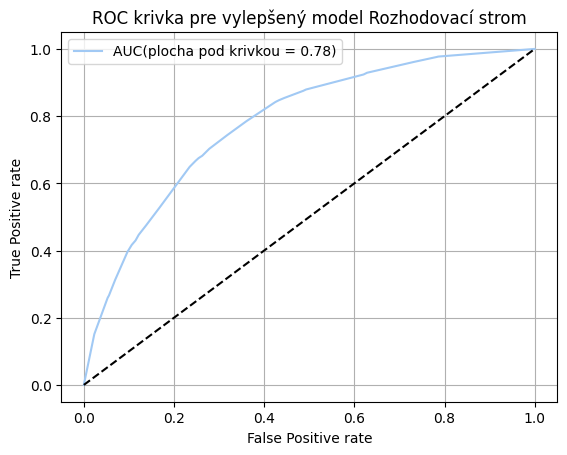

In [54]:
# predikcia pravdepodobnosti pre ROC krivku
# získanie pravdepodobností pre triedu 1 (pozitívnu triedu)- ma cukrovku
# predict_proba vráti pravdepodobnosti pre obe triedy, vyberieme iba pravdepodobnosť pre pozitívnu triedu
RS_pravdepodobnost_cukrovky =  RS_vlp.predict_proba(X_test)[:, 1]

# získanie hodnoty pre ROC krivku
fpr, tpr, thresholds = roc_curve(y_test, RS_pravdepodobnost_cukrovky)
# vypocet AUC (plocha pod krivkou)
# AUC je metrika, ktorá hodnotí výkonnosť klasifikačného modelu
#fpr – miera falošne pozitívnych (False Positive Rate)
#tpr – miera pravdivých pozitívnych (True Positive Rate)
roc_auc = auc(fpr, tpr)
# Vykreslenie krivky
#plocha pod krivkou (AUC) je metrika, ktorá hodnotí výkonnosť klasifikačného modelu, .2f zaokruhlenie na 2 desatine miesta
plt.figure()
plt.plot(fpr, tpr, label=f'AUC(plocha pod krivkou = {roc_auc:.2f})')
#kreslenie diagonálnej čiary, ktorá predstavuje náhodný klasifikátor, pod 45 stupnovym uhlom
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC krivka pre vylepšený model Rozhodovací strom')
plt.legend()
# grid True pre zobrazenie mriežky na grafe
plt.grid(True)
plt.show()


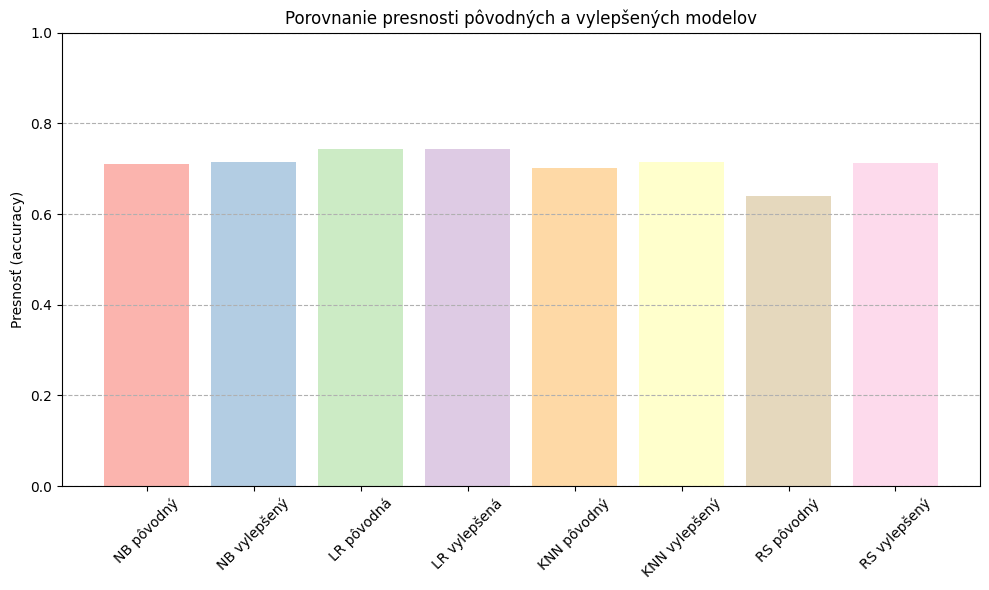

In [55]:
# ===== Porovnanie presnosti modelov =====
accuracy_scores = {
    "NB pôvodný": accuracy_score(y_test, y_pred_NB_orig),
    "NB vylepšený": accuracy_score(y_test, y_pred_NB_vlp),
    "LR pôvodná": accuracy_score(y_test, y_pred_LR_orig),
    "LR vylepšená": accuracy_score(y_test, y_pred_LR_vlp),
    "KNN pôvodný": accuracy_score(y_test, y_pred_KNN_orig),
    "KNN vylepšený": accuracy_score(y_test, y_pred_KNN_vlp),
    "RS pôvodný": accuracy_score(y_test, y_pred_RS_orig),
    "RS vylepšený": accuracy_score(y_test, y_pred_RS_vlp)
}

# Vykreslenie stĺpcového grafu
# accuracy_scores.keys() pre názvy modelov
# accuracy_scores.values() pre hodnoty presnosti
# nastavenie farieb pre stĺpce, nastavenie veľkosti grafu, nastavenie rozsahu y-osi, nastavenie popisu y-osi, nastavenie názvu grafu, nastavenie rotácie popisov x-osi, nastavenie mriežky pre y-osi, nastavenie rozloženia grafu
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["#FBB4AE", "#B3CDE3", "#CCEBC5", "#DECBE4", "#FED9A6", "#FFFFCC", "#E5D8BD", "#FDDAEC"])
plt.ylim(0, 1)
plt.ylabel("Presnosť (accuracy)")
plt.title("Porovnanie presnosti pôvodných a vylepšených modelov")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()